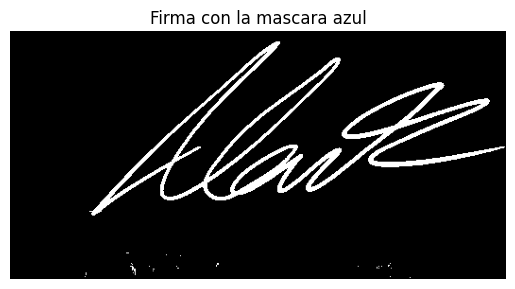

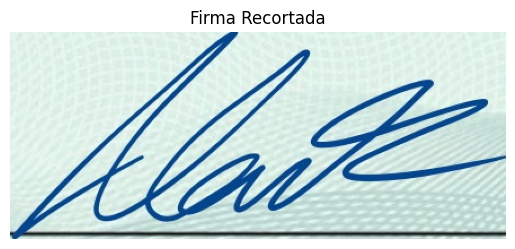

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Función para extraer la firma de un cheque
def extraer_firma_cheque(ruta_imagen):

    imagen = cv2.imread(ruta_imagen)

    if imagen is None:
        print("Error: No se pudo cargar la imagen.")
        return

    altura, ancho, _ = imagen.shape
    
    # Definir la ROI para la firma
    x_inicio = int(ancho * 0.61)
    y_inicio = int(altura * 0.55)
    ancho_roi = int(ancho * 0.315)
    alto_roi = int(altura * 0.35)

    # Extraer la ROI que contiene la firma
    roi = imagen[y_inicio:y_inicio + alto_roi, x_inicio:x_inicio + ancho_roi]

    # Convertir la ROI a espacio de color HSV
    roi_hsv = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

    # Definir rango para el color azul
    azul_bajo = np.array([100, 150, 0])
    azul_alto = np.array([140, 255, 255])

    # Crear una máscara para el color azul
    mascara = cv2.inRange(roi_hsv, azul_bajo, azul_alto)

    plt.imshow(mascara, cmap='gray')
    plt.axis('off')
    plt.title("Firma con la mascara azul")
    plt.show()

    # Encontrar los contornos en la máscara
    contornos, _ = cv2.findContours(mascara, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filtrar contornos y crear un rectángulo que los abarque a todos
    if contornos:
        # Filtrar contornos basados en el área
        contornos_filtrados = [c for c in contornos if cv2.contourArea(c) > 100]

        if contornos_filtrados:
            # Crear un nuevo contorno que abarque todos los contornos filtrados
            contorno_total = np.concatenate(contornos_filtrados)
            x, y, w, h = cv2.boundingRect(contorno_total)

            # Recortar la firma utilizando el rectángulo que abarca todos los contornos
            firma_recortada = roi[y:y+h, x:x+w]

            # Mostrar la firma recortada
            plt.imshow(cv2.cvtColor(firma_recortada, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            plt.title("Firma Recortada")
            plt.show()
        else:
            print("No se encontraron contornos válidos en la máscara.")
    else:
        print("No se encontraron contornos en la máscara.")

# Ruta
ruta_imagen = "Cheques_dataSet/Cheques_dataSet-35.jpg"

# Extraer y mostrar la firma
extraer_firma_cheque(ruta_imagen)


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def extraer_firma_cheque(ruta_imagen, carpeta_firmas):
    # Cargar la imagen usando OpenCV
    imagen = cv2.imread(ruta_imagen)

    if imagen is None:
        print(f"Error: No se pudo cargar la imagen {ruta_imagen}.")
        return

    altura, ancho, _ = imagen.shape

    
    # Definir la ROI para la firma (ROI = Region of Interest)
    x_inicio = int(ancho * 0.61)
    y_inicio = int(altura * 0.55)
    ancho_roi = int(ancho * 0.315)
    alto_roi = int(altura * 0.35)

    # Extraer la ROI que contiene la firma
    roi = imagen[y_inicio:y_inicio + alto_roi, x_inicio:x_inicio + ancho_roi]

    # Convertir la ROI a espacio de color HSV
    roi_hsv = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

    # Definir rango para el color azul
    azul_bajo = np.array([100, 150, 0])
    azul_alto = np.array([150, 255, 255])

    # Crear una máscara para el color azul
    mascara = cv2.inRange(roi_hsv, azul_bajo, azul_alto)

    # Mostrar la máscara
    plt.imshow(mascara, cmap='gray')
    plt.axis('off')
    plt.title(f"Máscara Azul - {os.path.basename(ruta_imagen)}")
    #plt.savefig(os.path.join(carpeta_firmas, f"mascara_{os.path.basename(ruta_imagen)}"))
    cv2.imwrite(os.path.join(carpeta_firmas, f"mascara_{os.path.basename(ruta_imagen)}"), mascara)
    plt.close()

    # Encontrar los contornos en la máscara
    contornos, _ = cv2.findContours(mascara, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filtrar contornos y crear un rectángulo que los abarque a todos
    if contornos:
        # Filtrar contornos basados en el área
        contornos_filtrados = [c for c in contornos if cv2.contourArea(c) > 100]

        if contornos_filtrados:
            # Crear un nuevo contorno que abarque todos los contornos filtrados
            contorno_total = np.concatenate(contornos_filtrados)
            x, y, w, h = cv2.boundingRect(contorno_total)

            # Recortar la firma utilizando el rectángulo que abarca todos los contornos
            firma_recortada = roi[y:y+h, x:x+w]

            # Mostrar la firma recortada
            plt.imshow(cv2.cvtColor(firma_recortada, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            plt.title(f"Firma Recortada - {os.path.basename(ruta_imagen)}")
            #plt.savefig(os.path.join(carpeta_firmas, f"firma_recortada_{os.path.basename(ruta_imagen)}"))
            cv2.imwrite(os.path.join(carpeta_firmas, f"firma_recortada_{os.path.basename(ruta_imagen)}"), firma_recortada)
            plt.close()
        else:
            print(f"No se encontraron contornos válidos en la máscara para la imagen {ruta_imagen}.")
    else:
        print(f"No se encontraron contornos en la máscara para la imagen {ruta_imagen}.")

# Rutas
ruta_carpeta_imagenes = "Cheques_dataSet"
carpeta_firmas = "firmas"

# Crear la carpeta si no existe
os.makedirs(carpeta_firmas, exist_ok=True)

for archivo in os.listdir(ruta_carpeta_imagenes):
    if archivo.endswith((".jpg", ".jpeg", ".png")):
        ruta_imagen = os.path.join(ruta_carpeta_imagenes, archivo)
        extraer_firma_cheque(ruta_imagen, carpeta_firmas)

print("Proceso completado.")


Proceso completado.


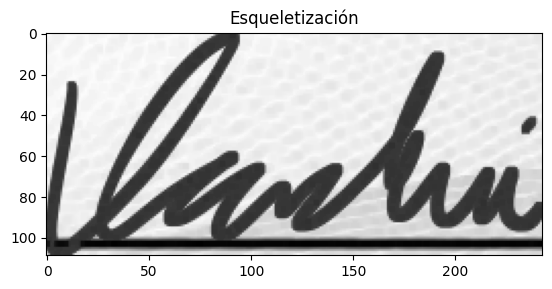

Características extraídas: [31784 32523 31080 29016 34730 32704 34998 27435 33060 35040 34632 39296
 41925 38007 40698 52751 36952 60117 55743 54773 64010 31369 42826 35591
 25752 26378 40820 48811 33580 32076 49140 69551 58900 67942 80960 63623
 60000 70975 63210 69012 70560 69078 62370 64740 60741 22275 18705 20274
 24378 16340 17200 17170 19504 19170 16632 21630 16443 16548 23358 26487]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Epoch 1/10


c:\Users\monts\OneDrive\Escritorio\UAA\Inteligencia Artificial\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 0.0000e+00 - loss: 1367.6708 - val_accuracy: 0.0000e+00 - val_loss: 679.0999
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0000e+00 - loss: 537.7536 - val_accuracy: 1.0000 - val_loss: 3.1418e-35
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 1.0000 - loss: 2.5052e-35 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 1.0000 - lo

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,829 (7.15 KB)

 Trainable params: 609 (2.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,220 (4.77 KB)

[[3.17840e+04 3.25230e+04 3.10800e+04 2.90160e+04 3.47300e+04 3.27040e+04
  3.49980e+04 2.74350e+04 3.30600e+04 3.50400e+04 3.46320e+04 3.92960e+04
  4.19250e+04 3.80070e+04 4.06980e+04 5.27510e+04 3.69520e+04 6.01170e+04
  5.57430e+04 5.47730e+04 6.40100e+04 3.13690e+04 4.28260e+04 3.55910e+04
  2.57520e+04 2.63780e+04 4.08200e+04 4.88110e+04 3.35800e+04 3.20760e+04
  4.91400e+04 6.95510e+04 5.89000e+04 6.79420e+04 8.09600e+04 6.36230e+04
  6.00000e+04 7.09750e+04 6.32100e+04 6.90120e+04 7.05600e+04 6.90780e+04
  6.23700e+04 6.47400e+04 6.07410e+04 2.22750e+04 1.87050e+04 2.02740e+04
  2.43780e+04 1.63400e+04 1.72000e+04 1.71700e+04 1.95040e+04 1.91700e+04
  1.66320e+04 2.16300e+04 1.64430e+04 1.65480e+04 2.33580e+04 2.64870e+04]
 [2.11943e+03 2.16870e+03 2.07250e+03 1.93490e+03 2.31583e+03 2.18077e+03
  2.33370e+03 1.82950e+03 2.20450e+03 2.33650e+03 2.30930e+03 2.62023e+03
  2.79550e+03 2.53430e+03 2.71370e+03 3.51723e+03 2.46397e+03 4.00830e+03
  3.71670e+03 3.65203e+03 4.26783e+03

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd  # Import pandas for creating tables

def creacion_DataSet(imagenes):
    
    def filtrar_y_erodir(image):
        # Convertir la imagen a escala de grises si no lo está
        if len(image.shape) == 3:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Aplicar un filtro gaussiano para reducir el ruido
        filtered = cv2.GaussianBlur(image, (5, 5), 0)

        # Umbralizar la imagen para asegurarse de que sea binaria
        #_, binary = cv2.threshold(filtered, 127, 255, cv2.THRESH_BINARY)

        # Crear una imagen para almacenar el resultado de la erosión
        eroded = np.zeros(image.shape, np.uint8)

        # Erosionar la imagen
        kernel = np.ones((3, 3), np.uint8)
        eroded = cv2.erode(image, kernel, iterations=1)

        return eroded
        
    skeleton = filtrar_y_erodir(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
    plt.imshow(skeleton, cmap='gray')
    plt.title('Esqueletización')
    plt.show()


    # Ensure images are in grayscale before processing
    extraccion = [filtrar_y_erodir(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)) for img in imagenes]

    def caracteristicas(img):
        kernel = np.ones((5, 5), np.uint8)
        eroded = cv2.erode(img, kernel, iterations=1)
        caract = np.count_nonzero(eroded)
        return caract
    
    caracteres = np.array([caracteristicas(img) for img in extraccion])
    print("Características extraídas:", caracteres)

    # Asegúrate de que las etiquetas coincidan con el número real de características
    #labels = np.array([1] * len(caracteres) + [0] * (len(caracteres) // 2))  # Ajusta según sea necesario
    
    labels = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])
    print(labels)

    # Ensure that the number of labels matches the number of features
    assert len(caracteres) == len(labels), "Number of features and labels must match."

    # Check if we have enough samples to split
    if len(caracteres) < 5:
        print("Not enough samples to split into training and testing sets.")
        return

    X_train, X_test, y_train, y_test = train_test_split(np.array(caracteres).reshape(-1, 1), labels, test_size=0.2)
    
    model = keras.Sequential([
        keras.layers.Dense(32, activation='relu', input_shape=(1,)),
        keras.layers.Dense(16, activation='relu'), 
        keras.layers.Dense(1, activation='sigmoid')# Binary classification
    ])

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Entrenamiento del modelo
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
    
    #Resumen del modelo 
    # Aplicamos el modelo y mostrammos el listado de las capas, parametros de cada una y el total de los 
    #   parametros entrenables de la red
    model.summary()

    th = 0.5
    PatSintP = np.array([((1/15)*numero)+th for numero in caracteres])
    PatSintN = np.array([random.uniform(1.0,999.0) for numero in caracteres])

    caracteres = np.round(caracteres, 2)
    PatSintP = np.round(PatSintP, 2)
    PatSintN = np.round(PatSintN, 2)

    DataSet = np.array([caracteres, PatSintP, PatSintN])
    DataSet = np.round(DataSet, 2)
    print(DataSet)

     # Create a DataFrame for better visualization of results.
    df_results = pd.DataFrame({'Filename': filename[:len(caracteres)], 'Características': caracteres, 'Patrones Sinteticos Positivos': PatSintP, 'Patrones Sinteticos Negativos': PatSintN })
    
    df_results.to_csv("DataSet.csv", index = False )

    # Display results in groups of 15.
    for i in range(0, len(df_results), 15):
        print("\nResultados de las características (de {} a {}):".format(i+1, min(i+15, len(df_results))))
        print(df_results.iloc[i:i+15].to_string(index=False))


ruta_carpeta_firmas = "firmas"
carpeta_patrones = "Extraccion_patrones"

os.makedirs(carpeta_patrones, exist_ok=True)


imagenes = []
filename =[]

ruta_firma = [os.path.join(ruta_carpeta_firmas, archivo) for archivo in os.listdir(ruta_carpeta_firmas)]

# Definir el rango de imágenes a procesar
inicio_rango = 0  # Índice inicial (incluyente)
fin_rango = 60     # Índice final (excluyente)

# Obtener la lista de todos los archivos en la carpeta
all_files = os.listdir(ruta_carpeta_firmas)

# Filtrar para incluir solo archivos de imagen (opcional)
image_files = [file for file in all_files if file.endswith(('.jpg', '.jpeg', '.png'))]

# Asegurarse de que el rango no exceda el número total de imágenes
if fin_rango > len(image_files):
    fin_rango = len(image_files)

# Iterar sobre el rango especificado
for i in range(inicio_rango, fin_rango):
    img = cv2.imread(os.path.join(ruta_carpeta_firmas, image_files[i]))
    if img is not None:
        imagenes.append(img)
        filename.append(image_files[i])

creacion_DataSet(imagenes)

print("Proceso completado")
